In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [32]:
df=pd.read_csv("data/Election_2024_Voters_Data.csv")
print(df.head())

          State Name Constituency Type  No Of Seats  Electors - Male  \
0     Andhra Pradesh               GEN           20         16430935   
1     Andhra Pradesh                SC            4          3152828   
2     Andhra Pradesh                ST            1           756088   
3     Andhra Pradesh             Total           25         20339851   
4  Arunachal Pradesh               GEN            2           444078   

   Electors - Female  Electors - Third Gender  Electors - Total  \
0           16993558                     2924          33427417   
1            3264103                      386           6417317   
2             800954                      111           1557153   
3           21058615                     3421          41401887   
4             454359                        5            898442   

   Electors - NRIs  Electors - Service  Voters - Male  ...  \
0             6778               56146       13231440  ...   
1             1126                9519  

In [33]:
print(df.columns)

Index(['State Name', 'Constituency Type', 'No Of Seats', 'Electors - Male',
       'Electors - Female', 'Electors - Third Gender', 'Electors - Total',
       'Electors - NRIs', 'Electors - Service', 'Voters - Male',
       'Voters - Female', 'Voters - Third Gender', 'Voters - Postal',
       'Voters - Total', 'Voters - NRIs', 'Voters - Poll %',
       'Rejected Votes (Postal)', 'Evm Rejected Votes', 'NOTA Votes',
       'Valid Votes Polled', 'Tendered Votes'],
      dtype='object')


In [34]:
df["Gender_Ratio"] = df["Voters - Female"] / (df["Voters - Male"] + 1)

In [35]:
features= df[["Voters - Poll %","Gender_Ratio","NOTA Votes","Valid Votes Polled"]]
print(features.head())

   Voters - Poll %  Gender_Ratio  NOTA Votes  Valid Votes Polled
0            81.58      1.029719      296563            26865338
1            84.51      1.022760       55335             5347943
2            74.87      1.038018       50470             1113975
3            81.78      1.028883      402368            33327256
4            81.07      1.092905        7191              716056


In [36]:
features=features.fillna(0)
print(features)


     Voters - Poll %  Gender_Ratio  NOTA Votes  Valid Votes Polled
0              81.58      1.029719      296563            26865338
1              84.51      1.022760       55335             5347943
2              74.87      1.038018       50470             1113975
3              81.78      1.028883      402368            33327256
4              81.07      1.092905        7191              716056
..               ...           ...         ...                 ...
104            58.65      0.891911       34788             5116405
105            58.65      0.891911       34788             5116405
106            71.19      1.024780         912              134612
107            71.19      1.024780         912              134612
108            66.10      0.949607     6371839           638990692

[109 rows x 4 columns]


In [37]:
scalar=StandardScaler()
scaled_features=scalar.fit_transform(features)
print(scaled_features)

[[ 1.38371312e+00  6.43297664e-01  1.95273748e-01  1.49722231e-01]
 [ 1.72078118e+00  5.56707684e-01 -1.93413408e-01 -1.97494866e-01]
 [ 6.11792735e-01  7.46548028e-01 -2.01252312e-01 -2.65816615e-01]
 [ 1.40672118e+00  6.32894369e-01  3.65755801e-01  2.53995466e-01]
 [ 1.32504257e+00  1.42947035e+00 -2.70987133e-01 -2.72237666e-01]
 [ 1.32504257e+00  1.42947035e+00 -2.70987133e-01 -2.72237666e-01]
 [ 1.44813568e+00  2.80981959e-01  3.55421918e-02 -1.19121626e-02]
 [ 1.12947407e+00  2.67162149e-01 -2.62110562e-01 -2.66417687e-01]
 [ 1.32044096e+00  4.75576152e-01 -2.33959794e-01 -2.53227229e-01]
 [ 1.41707480e+00  2.98818661e-01  1.04619609e-01  3.60276383e-02]
 [-1.51070072e+00  5.29575276e-01  8.87975013e-01  3.03087726e-01]
 [-1.62228981e+00  2.67078071e-01 -3.58465178e-03 -1.84071864e-01]
 [-1.52680636e+00  4.90873597e-01  1.16696425e+00  4.02808220e-01]
 [ 8.55678162e-01  1.27769953e+00 -2.64574217e-01 -2.69332065e-01]
 [ 8.55678162e-01  1.27769953e+00 -2.64574217e-01 -2.69332065e

In [42]:
inertia=[]
silhouette_scores=[]
K=range(2,10)

for k in K:
    kMeans=KMeans(n_clusters=k,random_state=42)
    kMeans.fit(scaled_features)
    inertia.append(kMeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_features,kMeans.labels_))

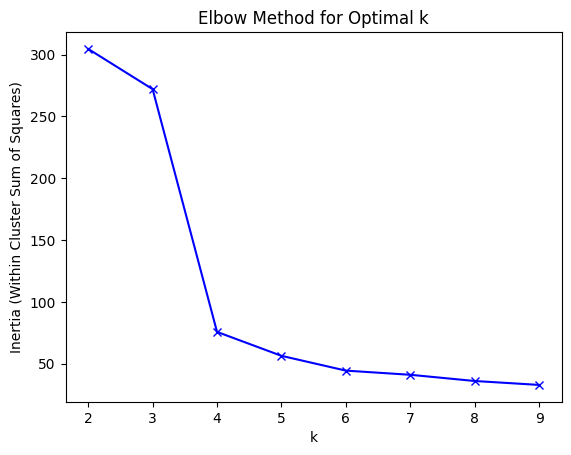

In [45]:
plt.plot(K,inertia,'bx-')
plt.xlabel('k')
plt.ylabel("Inertia (Within Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal k")
plt.show()

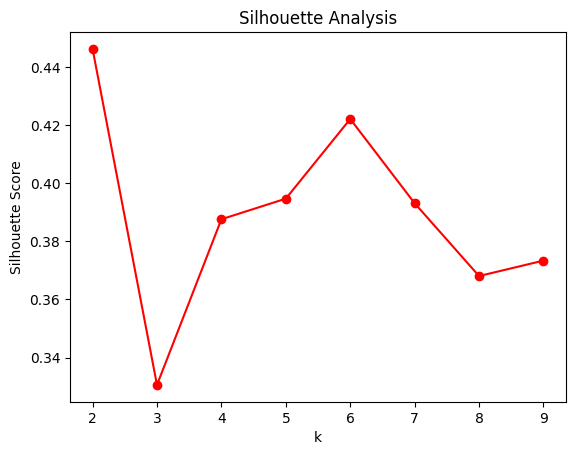

In [46]:
plt.plot(K, silhouette_scores, 'ro-')
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")
plt.show()